In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import ast

# Read in CSV files:

In [2]:
gpt = pd.read_csv('Data\GD_Benchmark_004_boosted_2024-07-17.csv')
llama = pd.read_csv('Data\Llama_3_GD_004_boosted_2024-07-15.csv')
phi = pd.read_csv('Data\phi_3_GD_test_006_boosted_2024-07-12.csv')
GD = pd.read_csv('Data\golden_dataset_union.csv')

Example dataframe:

In [3]:
gpt.head(20)

,barrier,barrier_retries,hazard,hazard_retries,lsr,lsr_retries,subhazard,subhazard_retries,observation_id,safe_type_boost,...,safe/unsafe,act/condition,name,comments from annotator,barrier_labels,observation,incorrect_lsr_labels,incorrect_barrier_labels,incorrect_hazard_labels,incorrect_subhazard_labels
0,['process containment'],0.0,"['biological', 'environment']",0.0,['confined space'],0.0,"['bacterial & viral', 'waste']","[0, 0]",1,unsafe,...,['Unsafe'],['Condition'],"['Ma', 'Al']","[""Depending on the circumstances, this is not ...",['inspections'],"Whilst answering natures call, it became appar...",[],[],[],[]
1,['following procedures'],0.0,"['biological', 'safety systems']",0.0,['work authorisation'],0.0,"['bacterial & viral', 'safety & environmentall...","[0, 0]",2,unsafe,...,"['Unsafe', 'Safe']","['Act', 'Condition']","['Al', 'Gu']",[],"['following procedures', 'protection systems']",During preparation works to change the supply ...,[],[],[],[]
2,['following procedures'],0.0,['radiation'],0.0,['work authorisation'],0.0,['x-ray'],[0],3,safe,...,['Safe'],['Act'],"['An', 'Ro']",['Work control - restricted access'],"['following procedures', 'inspections']",Good use of barriers to restrict access into w...,[],[],[],[]
3,"['following procedures', 'inspections']",0.0,"['chemical', 'environment']",0.0,['energy isolation'],0.0,"['discharge from vessels', 'spills']","[0, 0]",4,safe,...,['Safe'],['Act'],"['Ma', 'Da']",[],"['following procedures', 'process containment']",Observed team member de-canting oil from Mud p...,[],[],[],[]
4,"['following procedures', 'inspections', 'alarm...",0.0,['safety systems'],0.0,['hot work'],0.0,['area zone classification breach'],[0],5,safe,...,['Safe'],['Act'],"['Gu', 'Ro']",[],"['emergency response', 'authorising equipment'...",Observed work party conducting hot work. Fire ...,[],[],['fire'],[]
5,['following procedures'],0.0,['biological'],0.0,['confined space'],0.0,['bacterial & viral'],[0],6,unsafe,...,['Unsafe'],['Condition'],"['Al', 'Gu']","[""Whilst unpleasant, this isn't really a safet...",[],Upon returning to the TR I made to pick up a s...,[],[],[],[]
6,['following procedures'],0.0,"['chemical', 'safety systems']",0.0,['work authorisation'],0.0,[],"[0, 0]",7,safe,...,['Safe'],['Act'],"['An', 'Da']",[],"['following procedures', 'inspections']",OP observed conducting Biocide dosing operatio...,[],[],[],[]
7,['following procedures'],0.0,['human factors'],0.0,['work authorisation'],0.0,['competence levels'],[0],8,safe,...,['Safe'],['Act'],"['An', 'Ro']",['Work control - toolbox talk'],['following procedures'],Had discussion with construction crew who were...,[],[],[],[]
8,['following procedures'],0.0,"['electrical', 'mechanical', 'gravity']",0.0,"['work authorisation', 'line of fire']",0.0,"['equipment', 'equipment failure', 'dropped ob...","[0, 0, 0]",9,safe,...,['Safe'],['Act'],"['Gu', 'Ro']",[],"['following procedures', 'life-saving equipment']",Observed man replacing junction box on PA syst...,[],[],[],[]
9,['following procedures'],0.0,"['environment', 'mechanical', 'safety systems']",0.0,['confined space'],0.0,"['spills', 'equipment failure', 'safety & envi...","[0, 0, 0]",10,safe,...,['Safe'],"['Act', 'Condition']","['Ma', 'Al']",[],"['following procedures', 'life-saving equipment']",Observed FM tank clean team carry out pre entr...,[],[],[],[]


Here we find a count of all three label types for each model and put them into dictionaries

In [4]:
models = {
    'gpt': gpt,
    'llama': llama,
    'phi': phi,
    'GD': GD
}

In [5]:
lsr_gpt = {}
lsr_llama = {}
lsr_phi = {}
lsr_GD = {}

lsr_count_dicts = {
    'gpt': lsr_gpt,
    'llama': lsr_llama,
    'phi': lsr_phi,
    'GD': lsr_GD
}

lsr_col_name = {
    'gpt': 'lsr',
    'llama': 'lsr',
    'phi': 'lsr',
    'GD': 'lsr_labels'
}

for model_name, model in models.items():
    dict = lsr_count_dicts[model_name]
    for label in model[lsr_col_name[model_name]]:
        l = ast.literal_eval(label.lower())
        for i in l:
            if i in dict:
                dict[i] += 1
            else:
                dict[i] = 1

print(lsr_GD)

{'bypassing safety control': 73, 'work authorisation': 131, 'line of fire': 103, 'hot work': 14, 'confined space': 26, 'energy isolation': 30, 'safe mechanical lifting': 50, 'working at height': 28, 'driving safety': 7}


In [6]:
haz_gpt = {}
haz_llama = {}
haz_phi = {}
haz_GD = {}

haz_count_dicts = {
    'gpt': haz_gpt,
    'llama': haz_llama,
    'phi': haz_phi,
    'GD': haz_GD
}

haz_col_name = {
    'gpt': 'hazard',
    'llama': 'hazard',
    'phi': 'hazard',
    'GD': 'hazard_labels'
}

for model_name, model in models.items():
    dict = haz_count_dicts[model_name]
    for label in model[haz_col_name[model_name]]:
        l = ast.literal_eval(label.lower())
        for i in l:
            if i in dict:
                dict[i] += 1
            else:
                dict[i] = 1

print(haz_GD)

{'human factors': 162, 'biological': 13, 'environment': 25, 'radiation': 13, 'chemical': 60, 'safety systems': 53, 'temperature': 23, 'electrical': 20, 'gravity': 87, 'mechanical': 88, 'sound': 14, 'pressure': 19, 'major accident hazards': 44}


In [7]:
bar_gpt = {}
bar_llama = {}
bar_phi = {}
bar_GD = {}

bar_count_dicts = {
    'gpt': bar_gpt,
    'llama': bar_llama,
    'phi': bar_phi,
    'GD': bar_GD
}

bar_col_name = {
    'gpt': 'barrier',
    'llama': 'barrier',
    'phi': 'barrier',
    'GD': 'barrier_labels'
}

for model_name, model in models.items():
    dict = bar_count_dicts[model_name]
    for label in model[bar_col_name[model_name]]:
        l = ast.literal_eval(label.lower())
        for i in l:
            if i in dict:
                dict[i] += 1
            else:
                dict[i] = 1

print(bar_GD)

{'inspections': 98, 'following procedures': 230, 'protection systems': 18, 'process containment': 26, 'emergency response': 64, 'authorising equipment': 39, 'life-saving equipment': 28, 'structural integrity': 25, 'handover': 37, 'detection systems': 12, 'shutdown systems': 6, 'ignition control': 8, 'alarm response': 4}


# Finding the union of labels for each category:

In [8]:
lsr_all_labels = set(lsr_gpt.keys()).union(lsr_llama.keys()).union(lsr_phi.keys()).union(lsr_GD.keys())
lsr_sorted_labels = sorted(lsr_all_labels)

lsr_gpt_counts = [lsr_gpt.get(label, 0) for label in lsr_sorted_labels]
lsr_llama_counts = [lsr_llama.get(label, 0) for label in lsr_sorted_labels]
lsr_phi_counts = [lsr_phi.get(label, 0) for label in lsr_sorted_labels]
lsr_GD_counts = [lsr_GD.get(label, 0) for label in lsr_sorted_labels]

In [9]:
haz_all_labels = set(haz_gpt.keys()).union(haz_llama.keys()).union(haz_phi.keys()).union(haz_GD.keys())
haz_sorted_labels = sorted(haz_all_labels)

haz_gpt_counts = [haz_gpt.get(label, 0) for label in haz_sorted_labels]
haz_llama_counts = [haz_llama.get(label, 0) for label in haz_sorted_labels]
haz_phi_counts = [haz_phi.get(label, 0) for label in haz_sorted_labels]
haz_GD_counts = [haz_GD.get(label, 0) for label in haz_sorted_labels]

In [10]:
bar_all_labels = set(bar_gpt.keys()).union(bar_llama.keys()).union(bar_phi.keys()).union(bar_GD.keys())
bar_sorted_labels = sorted(bar_all_labels)

bar_gpt_counts = [bar_gpt.get(label, 0) for label in bar_sorted_labels]
bar_llama_counts = [bar_llama.get(label, 0) for label in bar_sorted_labels]
bar_phi_counts = [bar_phi.get(label, 0) for label in bar_sorted_labels]
bar_GD_counts = [bar_GD.get(label, 0) for label in bar_sorted_labels]

In [11]:
print(len(lsr_sorted_labels))
print(len(haz_sorted_labels))
print(len(bar_sorted_labels))

9
14
13


Function to plot a bar chart given the label counts

In [12]:
def plot_label_count(title, sorted_labels, bar_width, gpt, llama, phi, GD):
    r1 = np.arange(len(sorted_labels))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]


    # Create the bar chart
    plt.figure(figsize=(12, 8))

    plt.bar(r1, gpt, color='blue', width=bar_width, edgecolor='grey', label='GPT')
    plt.bar(r2, llama, color='green', width=bar_width, edgecolor='grey', label='Llama')
    plt.bar(r3, phi, color='red', width=bar_width, edgecolor='grey', label='Phi')
    plt.bar(r4, GD, color='orange', width=bar_width, edgecolor='grey', label='GD')

    # Add labels
    plt.xlabel('Labels', fontsize=15)
    plt.ylabel('Counts', fontsize=15)
    plt.xticks([r + bar_width for r in range(len(sorted_labels))], sorted_labels, rotation=90)
    plt.title(title, fontsize=18)

    # Add legend
    plt.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

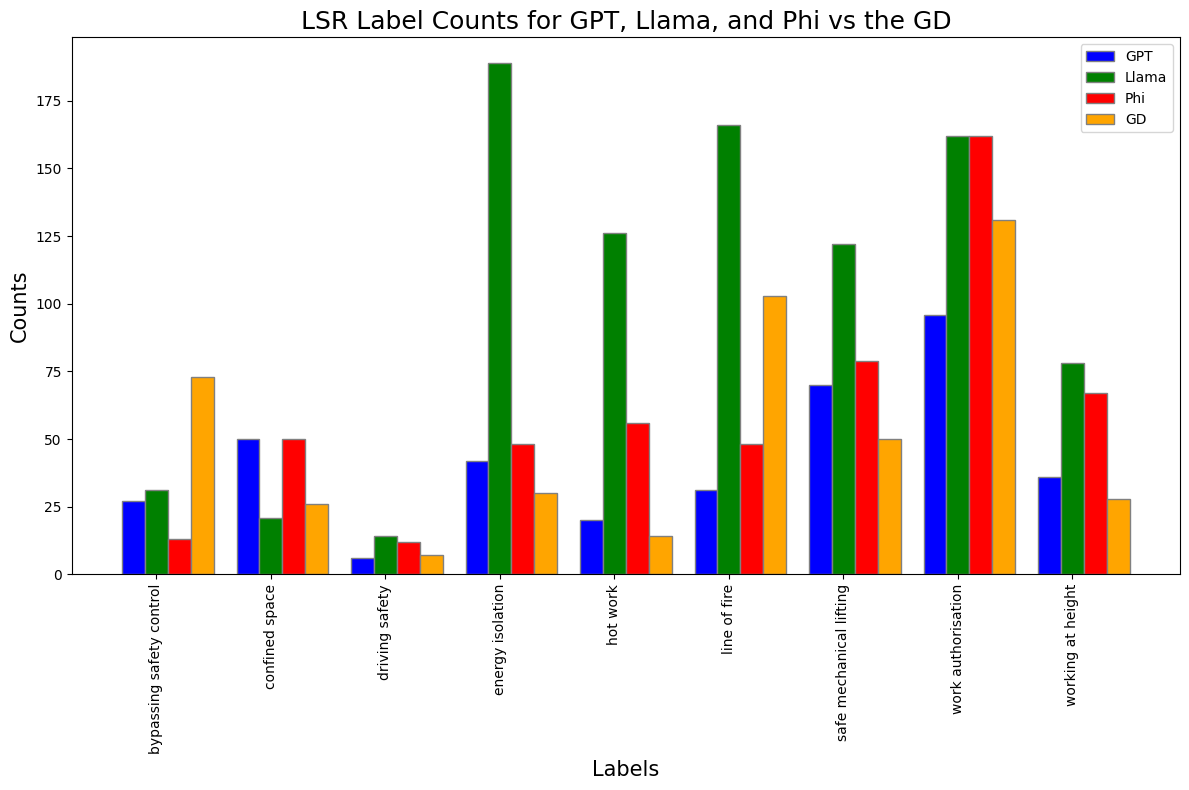

In [13]:
plot_label_count('LSR Label Counts for GPT, Llama, and Phi vs the GD', 
                lsr_sorted_labels, 
                0.2, 
                lsr_gpt_counts, 
                lsr_llama_counts, 
                lsr_phi_counts, 
                lsr_GD_counts)

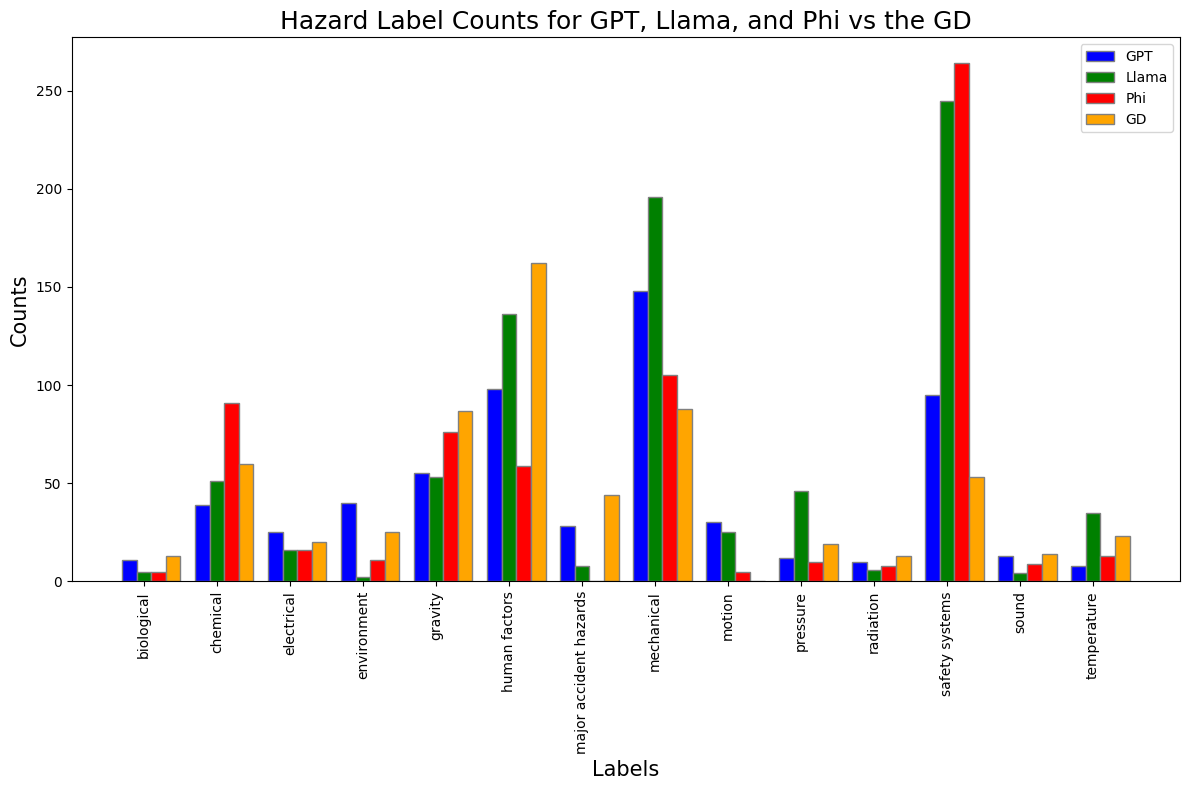

In [14]:
plot_label_count('Hazard Label Counts for GPT, Llama, and Phi vs the GD', 
                haz_sorted_labels, 
                0.2, 
                haz_gpt_counts, 
                haz_llama_counts, 
                haz_phi_counts, 
                haz_GD_counts)

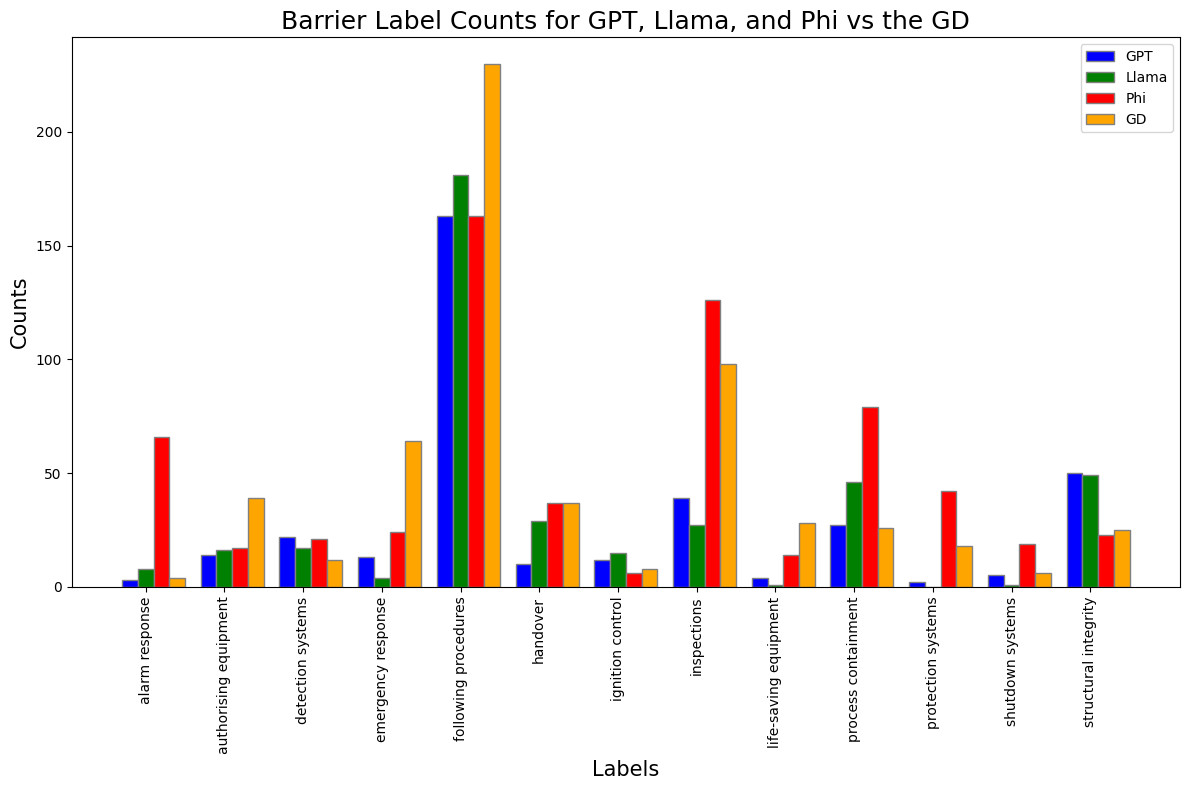

In [15]:
plot_label_count('Barrier Label Counts for GPT, Llama, and Phi vs the GD', 
                bar_sorted_labels, 
                0.2, 
                bar_gpt_counts, 
                bar_llama_counts, 
                bar_phi_counts, 
                bar_GD_counts)

# Finding total label count for each model:

In [16]:
lsr_labels = {
    'gpt': lsr_gpt_counts,
    'llama': lsr_llama_counts,
    'phi': lsr_phi_counts,
    'GD': lsr_GD_counts
}

bar_labels = {
    'gpt': bar_gpt_counts,
    'llama': bar_llama_counts,
    'phi': bar_phi_counts,
    'GD': bar_GD_counts
}

haz_labels = {
    'gpt': haz_gpt_counts,
    'llama': haz_llama_counts,
    'phi': haz_phi_counts,
    'GD': haz_GD_counts
}

In [17]:
lsr_tots = {
    'gpt': 0,
    'llama': 0,
    'phi': 0,
    'GD': 0
}

haz_tots = {
    'gpt': 0,
    'llama': 0,
    'phi': 0,
    'GD': 0
}

bar_tots = {
    'gpt': 0,
    'llama': 0,
    'phi': 0,
    'GD': 0
}


for model_name in models.keys():
    lsr_tots[model_name] = sum(lsr_labels[model_name])
    haz_tots[model_name] = sum(haz_labels[model_name])
    bar_tots[model_name] = sum(bar_labels[model_name])


We can put this into a dataframe for easy viewing

In [18]:
combined_tots = {
    'model': [model for model in models.keys()],
    'lsr_totals': [lsr_tots[model] for model in models.keys()],
    'haz_totals': [haz_tots[model] for model in models.keys()],
    'bar_totals': [bar_tots[model] for model in models.keys()]
}

df = pd.DataFrame(combined_tots)

print(df)


   model  lsr_totals  haz_totals  bar_totals
0    gpt         378         612         364
1  llama         909         828         394
2    phi         535         672         637
3     GD         462         621         595


We can now find some of the rows that have empty labels:

In [19]:
SAVE_OUTPUT = False

categories = ['lsr', 'barrier', 'hazard', 'observation']

models = {
    'gpt': gpt,
    'llama': llama,
    'phi': phi
}

model_to_check = 'phi'

empty_labels = {}

for model_to_check in models.keys():
    mask = models[model_to_check][categories] == '[]'
    rows = mask.any(axis=1)
    empty_labels[model_to_check] = models[model_to_check][rows][categories]
    if SAVE_OUTPUT:
        empty_labels[model_to_check].to_csv(f'Outputs\{model_to_check}_emtpy_labels.csv', index=False)

In [20]:
# from IPython.display import HTML

# pd.set_option('display.max_colwidth', None)

# for model in models.keys():
#     display(HTML(empty_labels[model].to_html(index=False)))

In [21]:
for haz in gpt['hazard']:
    for 

(23, 24)

'Deck crew noticed some residual oil on the walkway causing a potential slip hazard. On investigation it was found to be coming from a hose used by Operations during night-shift at Chemical tank FTO 513.'